<a href="https://colab.research.google.com/github/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_09_08_2021/notebooks/week_4_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

From Week 3 heatmaps- https://github.com/rajivsam/cmi_count_data_modeling/blob/asif_ikbal_09_08_2021/notebooks/week_3_tasks.ipynb :

Longest sequence of continuously available data for different quarters are-

Quarter-1: 76

Quarter-2: 28

Quarter-3: 49

Quarter-4: 60


In [142]:
import pandas as pd

In [143]:
data = pd.read_csv('https://raw.githubusercontent.com/rajivsam/cmi_count_data_modeling/asif_ikbal_09_08_2021/customers_per_hour.csv',index_col='Date')

In [144]:
data.drop(columns=['Count1','Count2','Count3','Count4','Count5','Count6','Count21','Count22','Count23','Count24'],inplace=True)

In [145]:
data

,Count7,Count8,Count9,Count10,Count11,Count12,Count13,Count14,Count15,Count16,Count17,Count18,Count19,Count20
Date,,,,,,,,,,,,,,
2010-12-01,0,0,3,12,9,11,20,12,7,11,9,4,0,0
2010-12-02,0,2,3,5,10,9,14,11,7,13,10,9,9,2
2010-12-03,0,0,0,5,6,4,9,6,9,6,3,2,0,0
2010-12-05,0,0,0,0,8,13,17,16,7,14,4,0,0,0
2010-12-06,0,0,2,4,11,12,19,13,8,12,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-12-05,0,0,3,5,9,9,18,16,16,11,15,6,0,0
2011-12-06,0,0,4,6,9,17,25,10,14,8,6,6,0,0
2011-12-07,0,0,7,7,8,12,20,12,9,11,5,4,0,0


In [146]:
data.columns=[str(i)+':00:00' for i in range(6,20)]

In [147]:
ts_data=pd.DataFrame(data.stack()).reset_index()

In [148]:
ts_data['dt_index']=ts_data['Date']+' '+ts_data['level_1']

In [149]:
ts_data.drop(columns=['Date','level_1'],inplace=True)


In [150]:
ts_data['dt_index']=pd.DatetimeIndex(ts_data['dt_index'])

In [151]:
ts_data.set_index('dt_index',inplace=True)

In [152]:
ts_data.columns=['customer_arr']

In [153]:
Q1=ts_data.loc[ts_data.index.isocalendar().week<=13]
Q2=ts_data.loc[(ts_data.index.isocalendar().week>13) & (ts_data.index.isocalendar().week<=26)]
Q3=ts_data.loc[(ts_data.index.isocalendar().week>26) & (ts_data.index.isocalendar().week<=39)]
Q4=ts_data.loc[ts_data.index.isocalendar().week>39]

In [154]:
Q1.head()

,customer_arr
dt_index,
2011-01-04 06:00:00,0
2011-01-04 07:00:00,0
2011-01-04 08:00:00,0
2011-01-04 09:00:00,0
2011-01-04 10:00:00,6


In [155]:
Q1.shape

(1078, 1)

In [156]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

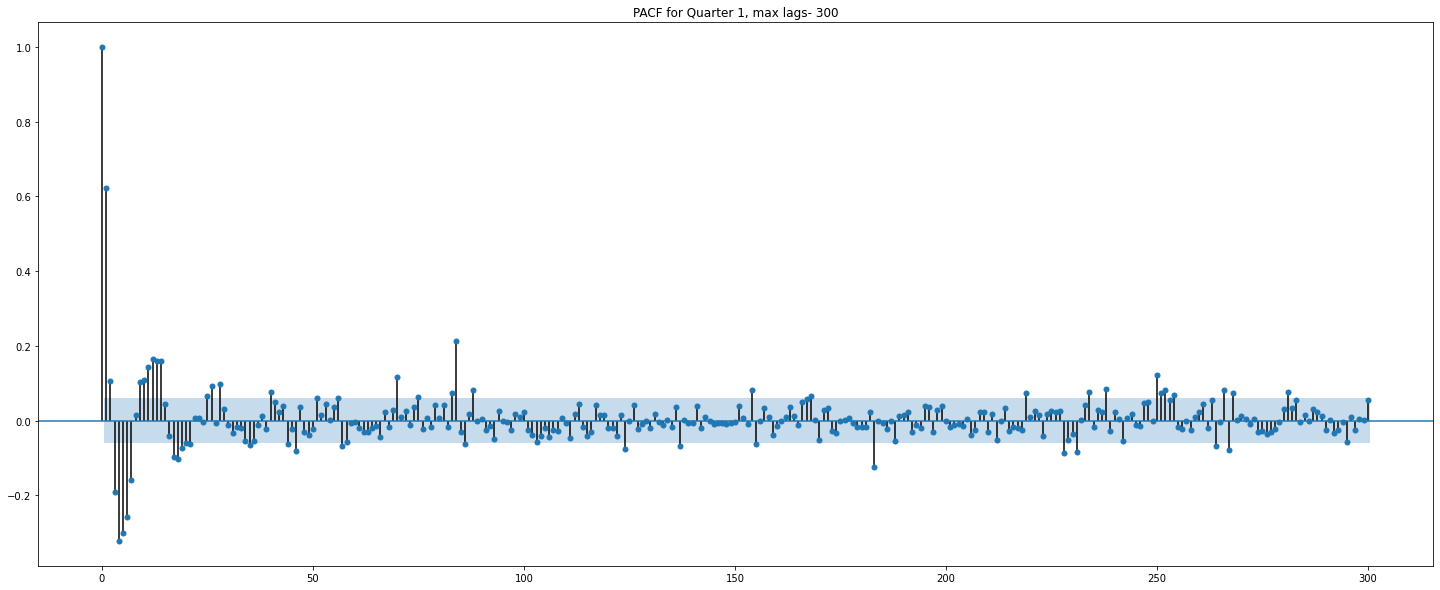

In [157]:
plt.rc("figure", figsize=(25,10))
plot_pacf(Q1,lags=300,title='PACF for Quarter 1, max lags- 300');

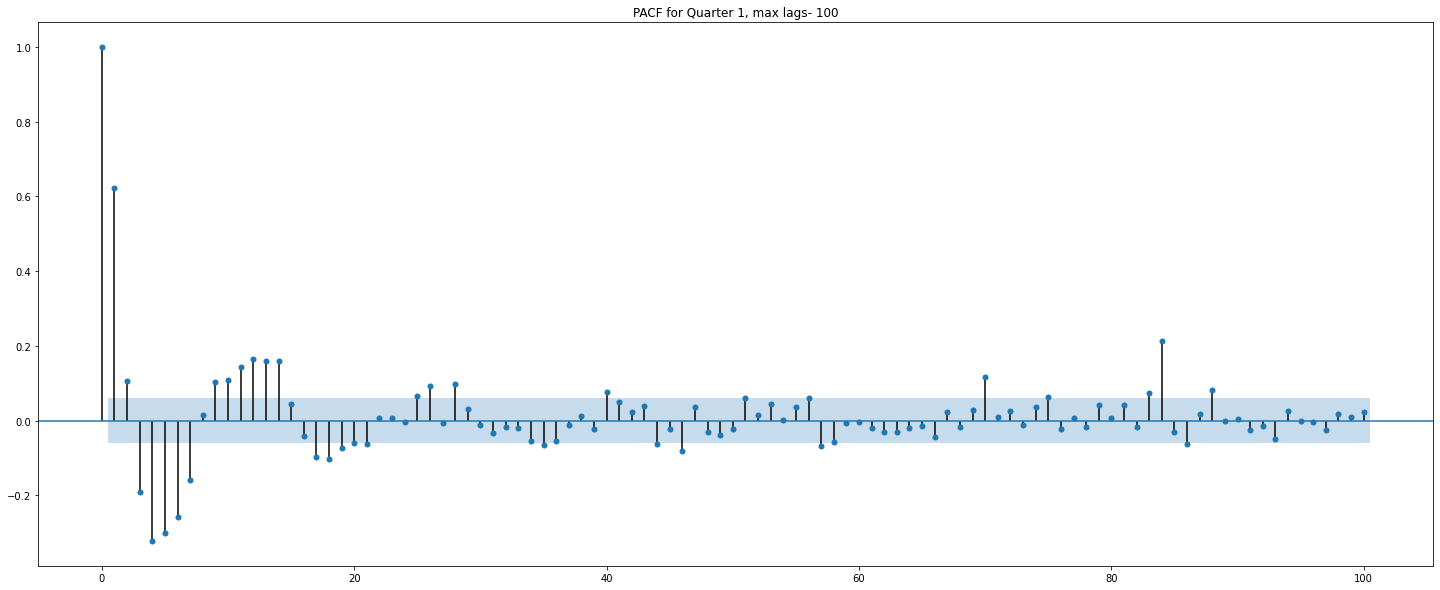

In [158]:
plot_pacf(Q1,lags=100,title='PACF for Quarter 1, max lags- 100');

In [159]:
from statsmodels.tsa.stattools import pacf

In [160]:
#Finding significant lags where correlation >0.1 or <-0.1
def sig_lags(Q):
  pacf_Q=pacf(Q,nlags=100)
  index=[]
  for i in range(1,len(pacf_Q)):
    if (pacf_Q[i]>0.1) or (pacf_Q[i]<-0.1):
      index.append(i)
  return index

In [161]:
sig_lags(Q1)

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 18, 70, 84]

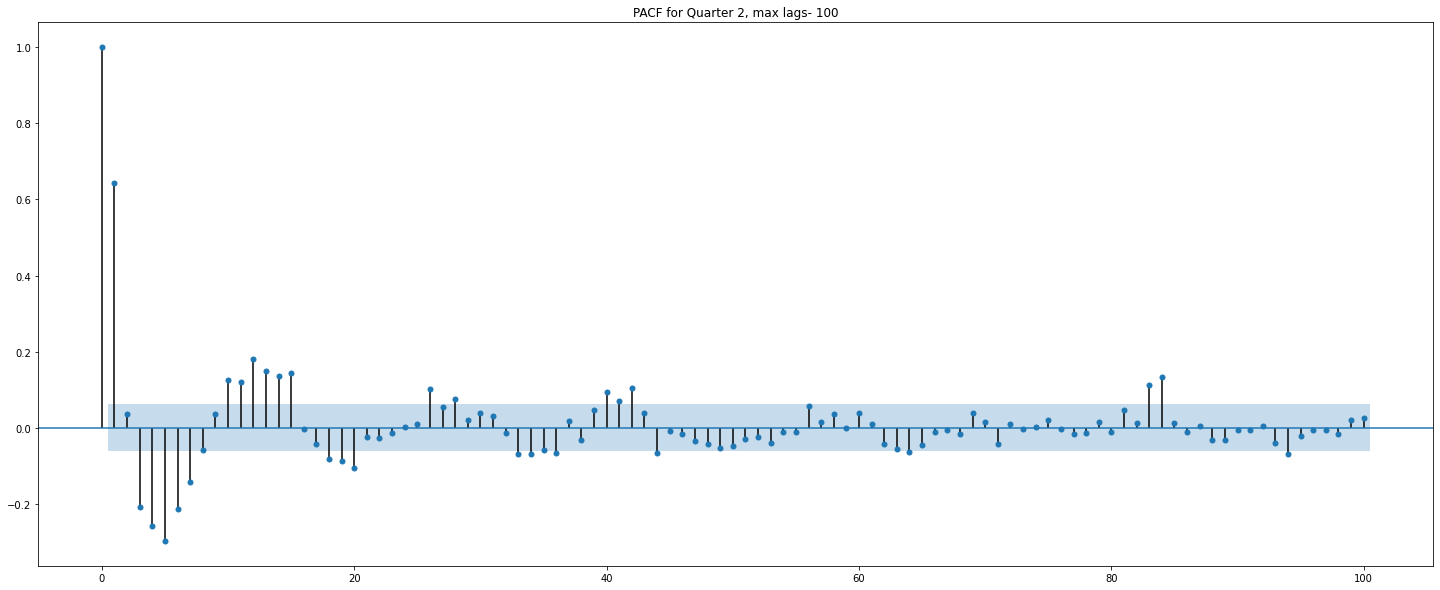

In [162]:
plot_pacf(Q2,lags=100,title='PACF for Quarter 2, max lags- 100');

In [163]:
sig_lags(Q2)

[1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14, 15, 20, 26, 42, 83, 84]

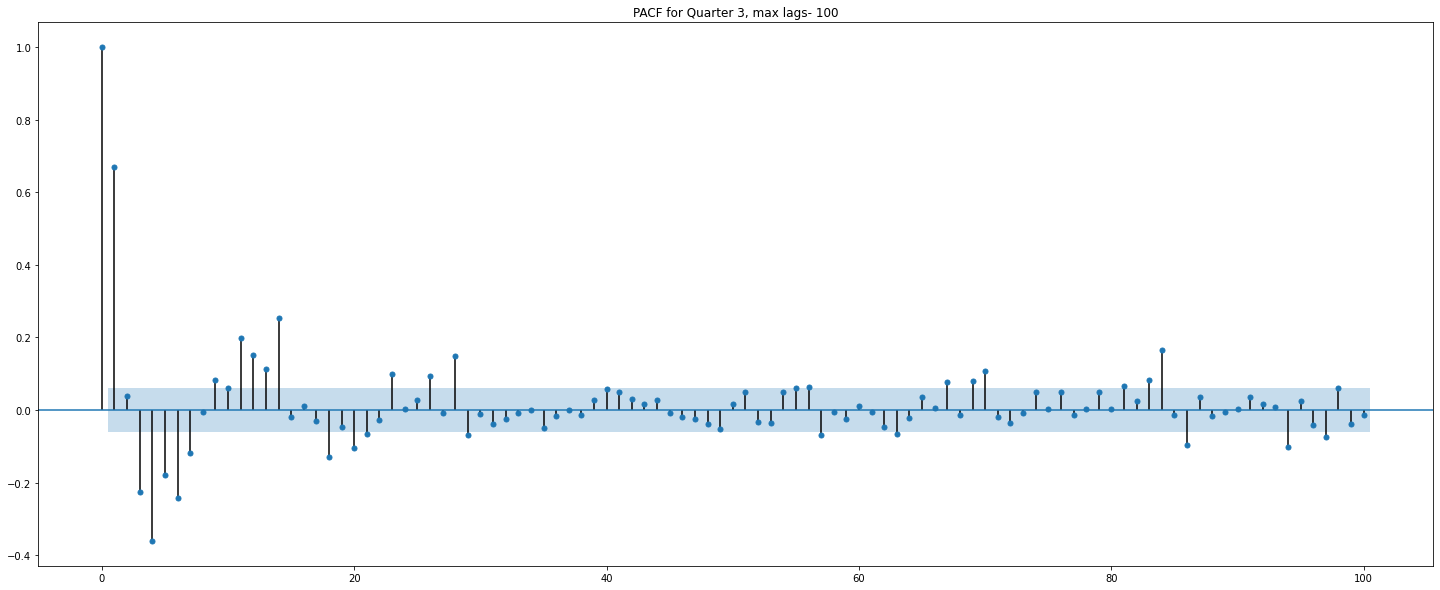

In [164]:
plot_pacf(Q3,lags=100,title='PACF for Quarter 3, max lags- 100');

In [165]:
sig_lags(Q3)

[1, 3, 4, 5, 6, 7, 11, 12, 13, 14, 18, 20, 28, 70, 84, 94]

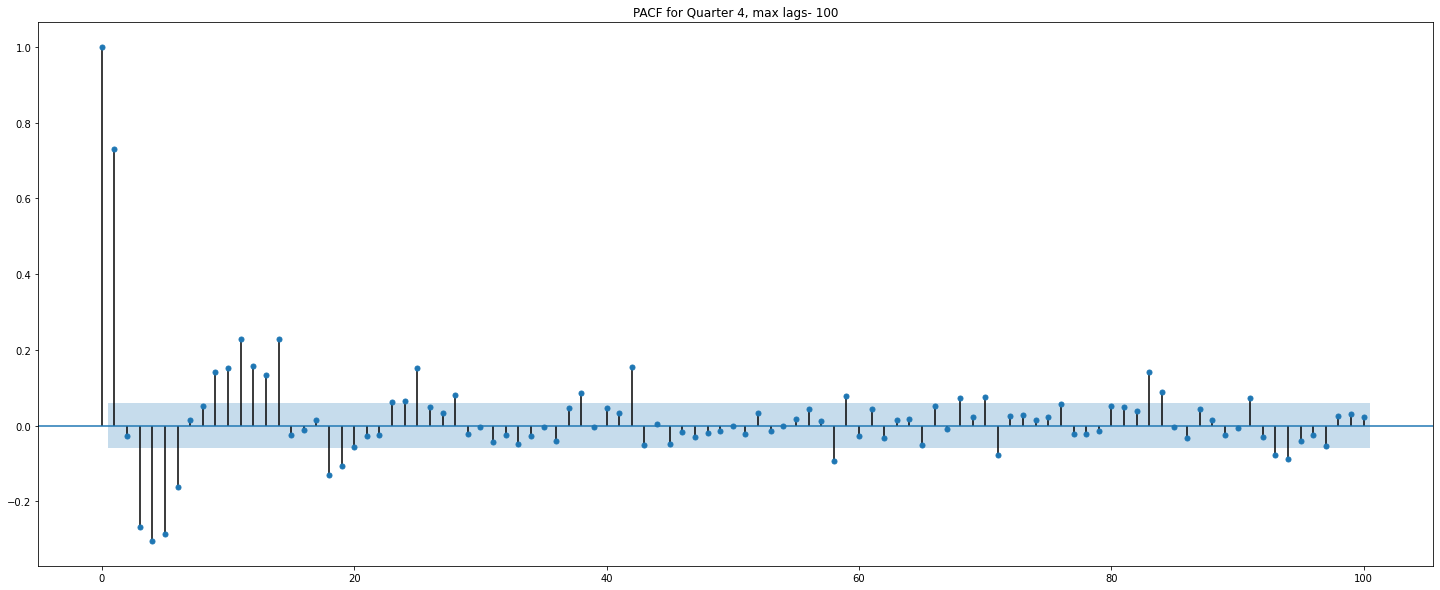

In [166]:
plot_pacf(Q4,lags=100,title='PACF for Quarter 4, max lags- 100');

In [167]:
sig_lags(Q4)

[1, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 25, 42, 83]